<a href="https://colab.research.google.com/github/Chand1919/Music-recommendation-Using-Artificial-intelligence/blob/main/Copy_of_hackerthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import yfinance as yf

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Book1.xlsx to Book1.xlsx


In [ ]:
dataset = pd.read_excel('Book1.xlsx')
dataset.head()

,FOOD COMMODITY,2015-16,Unnamed: 2,2016-17,Unnamed: 4,2017-18,Unnamed: 6,2018-19,Unnamed: 8,2019-20,...,2020-21,Unnamed: 12,2021-22,Unnamed: 14,2022-23,Unnamed: 16,2023-24,Unnamed: 18,2024-25,Unnamed: 20
0,NaN,RECO,FIXED,RECO,RECO,RECO,FIXED,RECO,FIXED,RECO,...,RECO,FIXED,RECO,FIXED,RECO,FIXED,RECO,FIXED,RECO,FIXED
1,KHARIF CROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PADDY COMMON,1410,1410,1470,1470,1550,1550,1745,1750,1815,...,1868,1868,1940,1940,2040,2040,2183,2183,2300,2300
3,URAD,1450,1450,1510,1510,1590,1590,1770,1770,1835,...,1888,1888,1960,1960,2060,2060,2203,2203,2320,2320
4,JOWAR-HYBRID,1570,1570,1625,1625,1700,1700,2430,2430,2550,...,2620,2620,2738,2738,2970,2970,3180,3180,3371,3371


In [ ]:
start ='2012-01-01'
end = '2024-01-01'


stock = 'Food'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.460000,1.460000,1.460000,1.460000,1.460000,32500
2012-01-04,1.460000,1.480000,1.460000,1.460000,1.460000,50000
2012-01-05,1.460000,1.460000,1.460000,1.460000,1.460000,40000
2012-01-06,9615.620117,9615.620117,9615.620117,9615.620117,9615.620117,0
2012-01-09,1.440000,1.460000,1.440000,1.460000,1.460000,52500
...,...,...,...,...,...,...
2022-02-23,0.320000,0.320000,0.320000,0.320000,0.320000,0
2022-02-24,0.320000,0.320000,0.320000,0.320000,0.320000,0
2022-02-28,0.320000,0.320000,0.320000,0.320000,0.320000,0


In [ ]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.460000,1.460000,1.460000,1.460000,1.460000,32500
1,2012-01-04,1.460000,1.480000,1.460000,1.460000,1.460000,50000
2,2012-01-05,1.460000,1.460000,1.460000,1.460000,1.460000,40000
3,2012-01-06,9615.620117,9615.620117,9615.620117,9615.620117,9615.620117,0
4,2012-01-09,1.440000,1.460000,1.440000,1.460000,1.460000,52500
...,...,...,...,...,...,...,...
2425,2022-02-23,0.320000,0.320000,0.320000,0.320000,0.320000,0
2426,2022-02-24,0.320000,0.320000,0.320000,0.320000,0.320000,0
2427,2022-02-28,0.320000,0.320000,0.320000,0.320000,0.320000,0
2428,2022-03-01,0.320000,0.320000,0.320000,0.320000,0.320000,0


In [ ]:
# Display the first few rows of the dataframe
print(data.head())

# Get a concise summary of the dataframe
print(data.info())

# Get statistical summary of numeric columns
print(data.describe())


        Date         Open         High          Low        Close    Adj Close  \
0 2012-01-03     1.460000     1.460000     1.460000     1.460000     1.460000   
1 2012-01-04     1.460000     1.480000     1.460000     1.460000     1.460000   
2 2012-01-05     1.460000     1.460000     1.460000     1.460000     1.460000   
3 2012-01-06  9615.620117  9615.620117  9615.620117  9615.620117  9615.620117   
4 2012-01-09     1.440000     1.460000     1.440000     1.460000     1.460000   

   Volume  
0   32500  
1   50000  
2   40000  
3       0  
4   52500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2430 non-null   datetime64[ns]
 1   Open       2430 non-null   float64       
 2   High       2430 non-null   float64       
 3   Low        2430 non-null   float64       
 4   Close      2430 non-null   float64       
 5   A

In [ ]:
# Drop duplicate rows
data_no_duplicates = data.drop_duplicates()


In [ ]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Fill missing values
data_filled = data.fillna(value={'column_name': 'default_value'})


In [ ]:
from scipy import stats

# Remove outliers based on z-score
data_no_outliers = data[(np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['float64', 'int64'])), columns=data.select_dtypes(include=['float64', 'int64']).columns)


In [ ]:
print(data_cleaned.info())
print(data_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2430 non-null   datetime64[ns]
 1   Open       2430 non-null   float64       
 2   High       2430 non-null   float64       
 3   Low        2430 non-null   float64       
 4   Close      2430 non-null   float64       
 5   Adj Close  2430 non-null   float64       
 6   Volume     2430 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 133.0 KB
None
                                Date          Open          High  \
count                           2430   2430.000000   2430.000000   
mean   2016-11-19 21:15:51.111111168   1104.132077   1104.134370   
min              2012-01-03 00:00:00      0.130000      0.150000   
25%              2014-06-04 06:00:00      0.200000      0.210000   
50%              2016-10-29 12:00:00      0.320000     

In [ ]:
# Save to CSV
data_cleaned.to_csv('path_to_cleaned_file.csv', index=False)


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

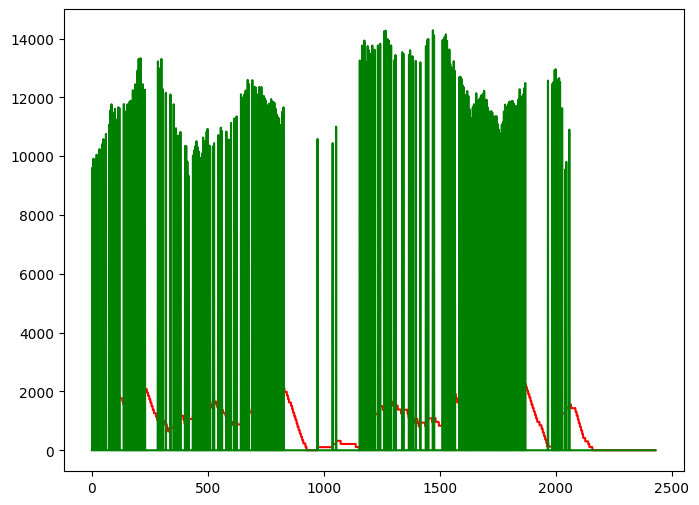

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(100).mean()

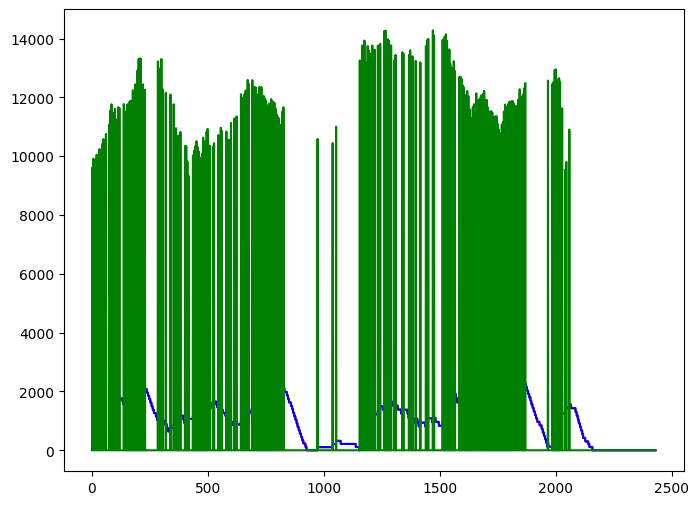

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train =pd.DataFrame (data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame (data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

1944

In [ ]:
data_test.shape[0]

486

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i]) # Changed the slice to [i-100:i] to ensure consistent shapes.
  y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation='relu', return_sequences = True)) # Changed 'activate' to 'activation' and 'return_sequence' to 'return_sequences'
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation = 'relu', return_sequences = True)) # Changed 'return_sequence' to 'return_sequences'
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # Removed the leading space in front of 'mean_squared_error'

In [ ]:
model.fit(x,y,epochs = 50 , batch_size = 32,verbose=1)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 514ms/step - loss: 0.0766
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - loss: 0.0699
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - loss: 0.0660
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 267ms/step - loss: 0.0672
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 269ms/step - loss: 0.0715
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms/step - loss: 0.0717
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - loss: 0.0671
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - loss: 0.0684
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - loss: 0.0654
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0695
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - loss: 0.0699
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - loss: 0.0667
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 290ms/step - loss: 0.0651
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 265ms/step - loss: 0.0683
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test

,Close
0,12276.599609
1,0.320000
2,0.320000
3,0.320000
4,0.320000
...,...
581,0.320000
582,0.320000
583,0.320000
584,0.320000


In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
# Display the first few rows of the dataframe
print(data.head())

# Get a concise summary of the dataframe
print(data.info())

# Get statistical summary of numeric columns
print(data.describe())


        Date         Open         High          Low        Close    Adj Close  \
0 2012-01-03     1.460000     1.460000     1.460000     1.460000     1.460000   
1 2012-01-04     1.460000     1.480000     1.460000     1.460000     1.460000   
2 2012-01-05     1.460000     1.460000     1.460000     1.460000     1.460000   
3 2012-01-06  9615.620117  9615.620117  9615.620117  9615.620117  9615.620117   
4 2012-01-09     1.440000     1.460000     1.440000     1.460000     1.460000   

   Volume  
0   32500  
1   50000  
2   40000  
3       0  
4   52500  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2430 non-null   datetime64[ns]
 1   Open       2430 non-null   float64       
 2   High       2430 non-null   float64       
 3   Low        2430 non-null   float64       
 4   Close      2430 non-null   float64       
 5   A

In [ ]:
# Drop duplicate rows
data_no_duplicates = data.drop_duplicates()


In [ ]:
from scipy import stats

# Remove outliers based on z-score
data_no_outliers = data[(np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=['float64', 'int64'])), columns=data.select_dtypes(include=['float64', 'int64']).columns)


In [ ]:
print(data_cleaned.info())
print(data_cleaned.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2430 non-null   datetime64[ns]
 1   Open       2430 non-null   float64       
 2   High       2430 non-null   float64       
 3   Low        2430 non-null   float64       
 4   Close      2430 non-null   float64       
 5   Adj Close  2430 non-null   float64       
 6   Volume     2430 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 133.0 KB
None
                                Date          Open          High  \
count                           2430   2430.000000   2430.000000   
mean   2016-11-19 21:15:51.111111168   1104.132077   1104.134370   
min              2012-01-03 00:00:00      0.130000      0.150000   
25%              2014-06-04 06:00:00      0.200000      0.210000   
50%              2016-10-29 12:00:00      0.320000     

In [ ]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i]) # Use correct slicing to get a 100-length sequence
  y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)


In [ ]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step


In [ ]:
y_predict

array([[ 3.28814164e-02],
       [ 3.27760279e-02],
       [ 3.27231213e-02],
       [ 3.26754227e-02],
       [ 3.26324366e-02],
       [ 3.25937197e-02],
       [ 3.25347334e-02],
       [ 3.25057134e-02],
       [ 3.24795991e-02],
       [ 3.24561000e-02],
       [ 3.24349627e-02],
       [ 3.24027725e-02],
       [ 3.23869959e-02],
       [ 3.23728137e-02],
       [ 3.23600657e-02],
       [ 3.23486142e-02],
       [ 3.23289260e-02],
       [ 3.23206261e-02],
       [ 3.23131606e-02],
       [ 3.23064551e-02],
       [ 3.22924443e-02],
       [ 3.22878435e-02],
       [ 3.22837047e-02],
       [ 4.57785092e-02],
       [ 6.73478246e-02],
       [ 9.30277258e-02],
       [ 1.20086640e-01],
       [ 1.46072879e-01],
       [ 1.68610871e-01],
       [ 1.86182290e-01],
       [ 1.98436230e-01],
       [ 2.05509201e-01],
       [ 2.07913831e-01],
       [ 2.06274465e-01],
       [ 2.01389045e-01],
       [ 1.93907648e-01],
       [ 1.84066072e-01],
       [ 1.72659487e-01],
       [ 1.6

In [ ]:
scale=1/scaler.scale_

In [ ]:
y_predict = y_predict*scale


In [ ]:
# Assuming 'y' corresponds to a single feature,
# you should select the corresponding scaling factor from 'scale'
y = y * scale[0] # Or the appropriate index if 'y' corresponds to another feature

# If 'y' has 6 columns and you want to apply the scaling to each column:
# Check if y is a numpy array, if not convert it
if not isinstance(y, np.ndarray):
    y = np.array(y)

# Reshape y to be a 2D array if it's currently 1D
if y.ndim == 1:
    y = y.reshape(-1, 1)

y = y * scale

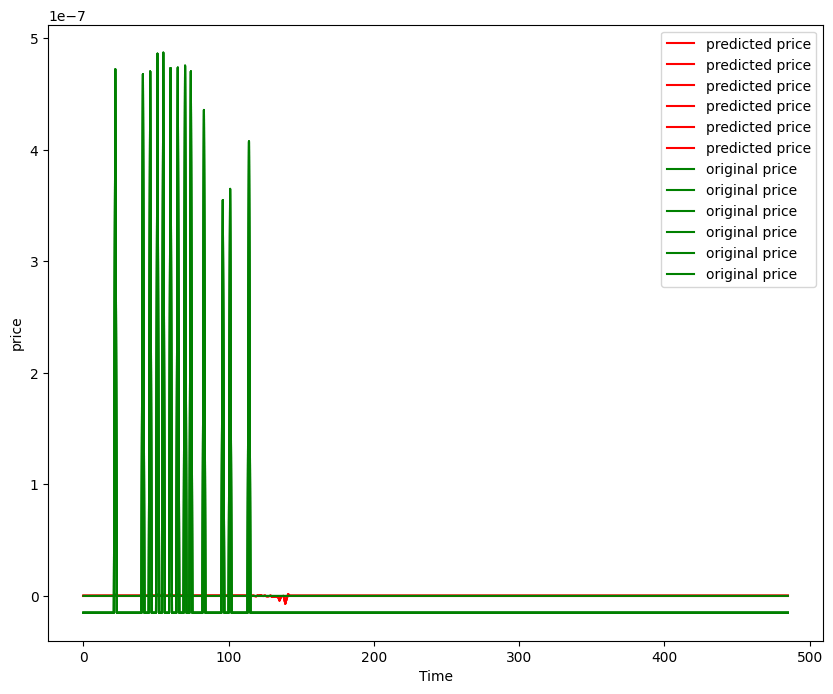

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'predicted price')
plt.plot(y,'g',label = 'original price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
model.save('stock prediction.model.keras')